In [ ]:
## Step 10: Data Cleaning & Feature Engineering
# 1. Drop columns that are not useful for prediction
df_model = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

# 2. Handle missing values
df_model['age'].fillna(df_model['age'].median(), inplace=True)   # Fill Age with median
df_model['embarked'].fillna(df_model['embarked'].mode()[0], inplace=True)  # Fill Embarked with most frequent
df_model['fare'].fillna(df_model['fare'].median(), inplace=True) # Fill Fare with median

# 3. Convert categorical columns into dummy variables
df_model = pd.get_dummies(df_model, drop_first=True)

# 4. Show first 5 rows
df_model.head()


NameError: name 'df' is not defined

In [ ]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset again
df = sns.load_dataset('titanic')

# Optional: Check first few rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 1. Drop columns that are not useful for prediction
df_model = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

# 2. Handle missing values
df_model['age'].fillna(df_model['age'].median(), inplace=True)   # Fill Age with median
df_model['embarked'].fillna(df_model['embarked'].mode()[0], inplace=True)  # Fill Embarked with most frequent
df_model['fare'].fillna(df_model['fare'].median(), inplace=True) # Fill Fare with median

# 3. Convert categorical columns into dummy variables
df_model = pd.get_dummies(df_model, drop_first=True)

# 4. Show first 5 rows
df_model.head()


/tmp/ipython-input-4080315913.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['age'].fillna(df_model['age'].median(), inplace=True)   # Fill Age with median
/tmp/ipython-input-4080315913.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,True,False,True


In [ ]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target (y)
X = df_model.drop('survived', axis=1)  # All columns except 'survived'
y = df_model['survived']               # Target column

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42     # For reproducibility
)

# Show the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 9), (179, 9), (712,), (179,))

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Create the model
model = LogisticRegression(max_iter=200)  # max_iter increased for convergence

# 2. Train the model on training data
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=500)

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train Logistic Regression on scaled data
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train Logistic Regression with liblinear solver
model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# 1. Make predictions
y_pred = model.predict(X_test_scaled)

# 2. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 3. Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



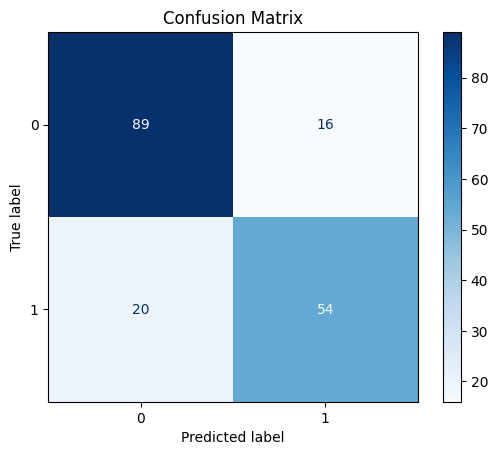

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
